In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Read the Data

toyota_cars = pd.read_csv('Toyota.csv',index_col=0,na_values=['??','????'])

In [3]:
#deep copy
df = toyota_cars.copy(deep=True)
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


## Data Preprocessing & Cleanning

In [4]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435],
           dtype='int64', length=1436)

In [5]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [6]:
df.size

14360

In [7]:
df.shape

(1436, 10)

In [8]:
df.memory_usage()

Index        11488
Price        11488
Age          11488
KM           11488
FuelType     11488
HP           11488
MetColor     11488
Automatic    11488
CC           11488
Doors        11488
Weight       11488
dtype: int64

In [9]:
df.ndim

2

In [10]:
df.dtypes

Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

In [11]:
#at prvide a scalar lookups [rows,col]
df.at[4,'Age']

30.0

In [12]:
#iat provide index based lookups
df.iat[4,6]

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 155.7+ KB


In [14]:
np.unique(df['Age'])

array([ 1.,  2.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., nan])

In [15]:
np.unique(df['KM'])

array([1.0000e+00, 1.5000e+01, 2.2500e+02, ..., 2.3294e+05, 2.4300e+05,
              nan])

In [16]:
np.unique(df['MetColor'])

array([ 0.,  1., nan])

In [17]:
np.unique(df['HP'])

array([ 69.,  71.,  72.,  73.,  86.,  90.,  97.,  98., 107., 110., 116.,
       192.,  nan])

In [18]:
np.unique(df['Doors'])

array(['2', '3', '4', '5', 'five', 'four', 'three'], dtype=object)

In [19]:
df['FuelType'].unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

In [20]:
df['MetColor'] = df['MetColor'].astype('object')
df['Automatic'] = df['Automatic'].astype('object')

In [21]:
df['FuelType'].nbytes

11488

 This step is not necessary for small data, only necessary for big data

In [22]:
# These is why because the fuel type is cantain categorical values so you have to convert categorical as it is.
# it will help to reduce the storage space
#df['FuelType'] = df['FuelType'].astype('category')
#df['FuelType'].nbytes

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 155.7+ KB


In [24]:
df.describe()

,Price,Age,KM,HP,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,1615.00000


In [25]:
df['Doors'].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [26]:
df['Doors'].replace('three',3,inplace=True)
df['Doors'].replace('four',4,inplace=True)
df['Doors'].replace('five',5,inplace=True)

In [27]:
df.dtypes

Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor      object
Automatic     object
CC             int64
Doors         object
Weight         int64
dtype: object

In [28]:
df['Doors'] = df['Doors'].astype('int64')

In [29]:
df.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [30]:
df.insert(10,'Price_class'," ")

In [31]:
# Using While loop

i = 0

while i<len(df['Price']):
    if ((df['Price'][i]<=8450)):
        df['Price_class'][i]='Low'
    elif ((df['Price'][i]>11950)):
        df['Price_class'][i]='High'
    else: df['Price_class'][i]='Mediam'
    i = i+1 
    

In [32]:
df['Price_class'].value_counts()

Mediam    751
Low       369
High      316
Name: Price_class, dtype: int64

In [33]:
df.insert(11,'Age_converted'," ")

In [34]:
def c_convert(val):
    val_converted = val/12
    return val_converted

In [35]:
df['Age_converted'] = c_convert(df['Age'])
df['Age_converted'] = round(df['Age_converted'],1)

In [36]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,Age_converted
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.2
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.5


In [37]:
df1 = df.dropna()

# Data Visualization

Text(0, 0.5, 'Price')

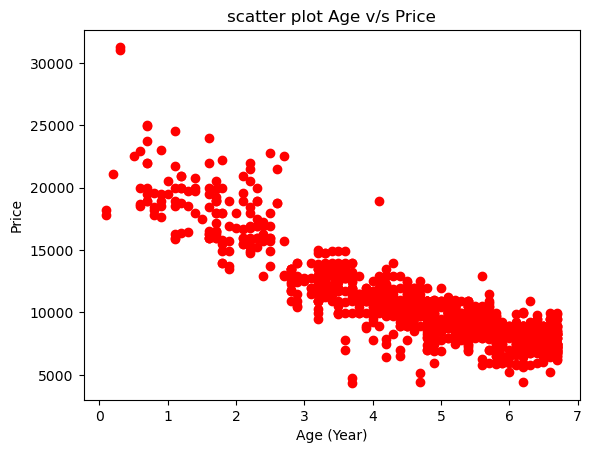

In [38]:
plt.scatter(x=df1['Age_converted'],y=df1['Price'],c='red')
plt.title('scatter plot Age v/s Price')
plt.xlabel('Age (Year)')
plt.ylabel('Price')

Text(0, 0.5, 'Frequency')

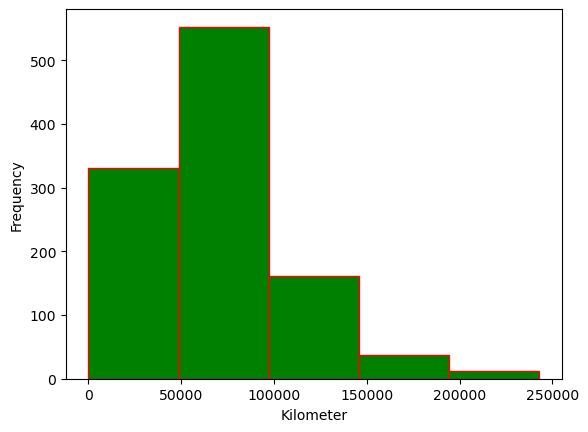

In [39]:
plt.hist(df1['KM'],color='green',edgecolor='red',bins=5);
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

In [40]:
counts = [968,112,12]
fueltype = ('Petrol','Diesel','CNG')
index = np.arange(len(fueltype))

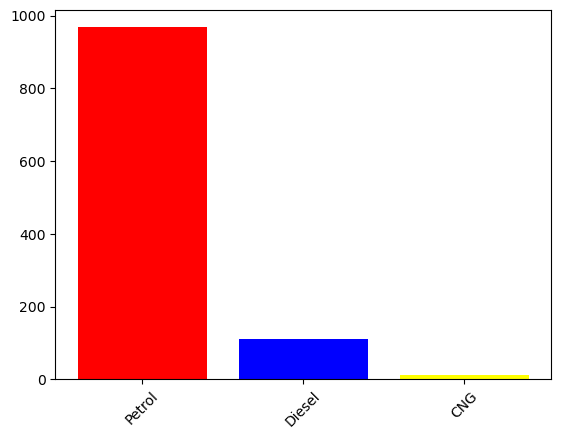

In [41]:
plt.bar(index,counts, color=['red','blue','yellow'])
plt.xticks(index,fueltype,rotation=45);
plt.show()

<Axes: xlabel='Age', ylabel='Price'>

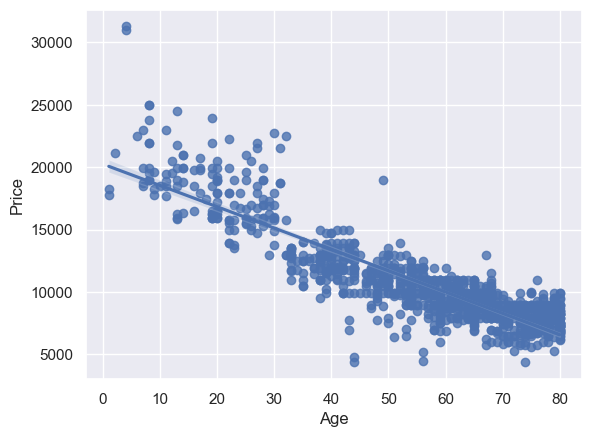

In [42]:
sns.set(style='darkgrid')
sns.regplot(x=df1['Age'],y=df1['Price'])

Text(0.5, 33.281249999999986, 'Age (Years)')

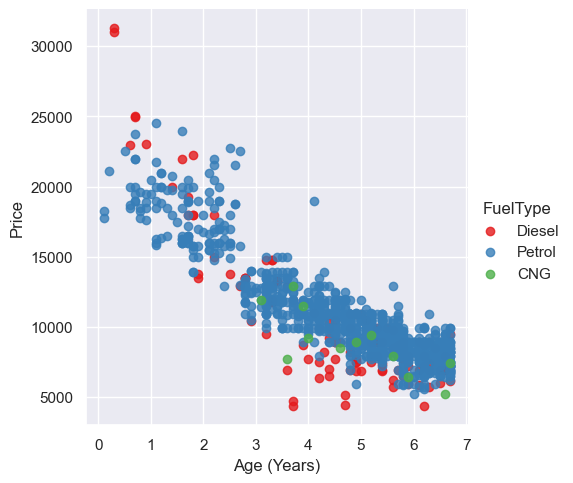

In [43]:
sns.lmplot(x='Age_converted',y='Price',data=df1,fit_reg=False,hue='FuelType',legend=True,palette='Set1')
plt.xlabel('Age (Years)')

<Axes: xlabel='Age_converted', ylabel='Density'>

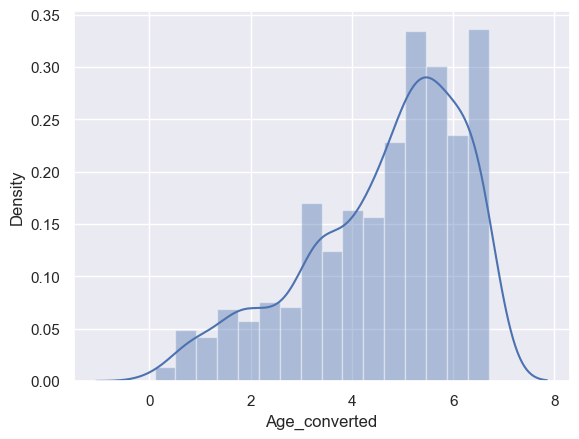

In [44]:
sns.distplot(df1['Age_converted'])

<Axes: xlabel='Age_converted'>

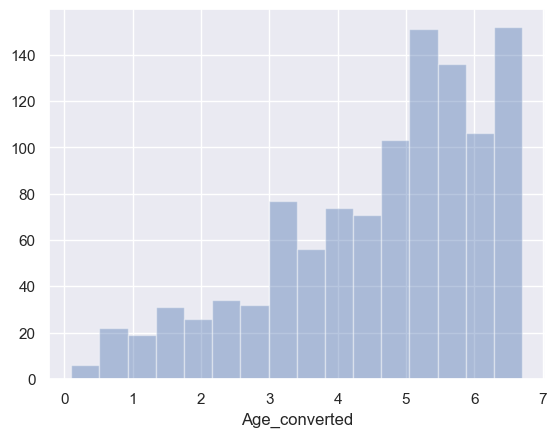

In [45]:
sns.distplot(df1['Age_converted'],kde=False)

<Axes: xlabel='FuelType', ylabel='count'>

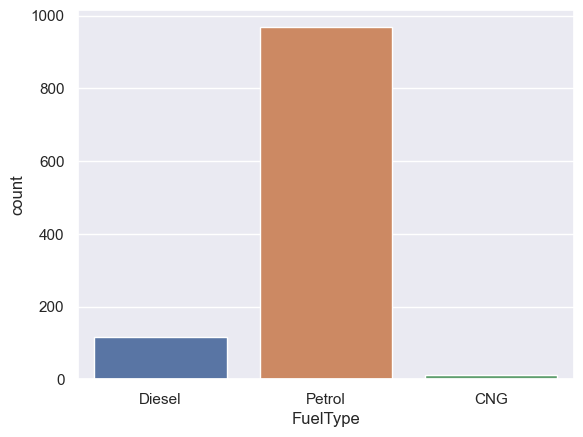

In [46]:
sns.countplot(x='FuelType',data=df1)

<Axes: xlabel='FuelType', ylabel='count'>

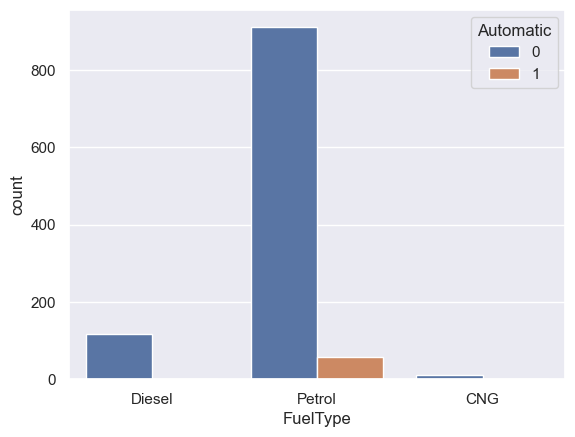

In [47]:
sns.countplot(x='FuelType',data=df1,hue='Automatic')

<Axes: >

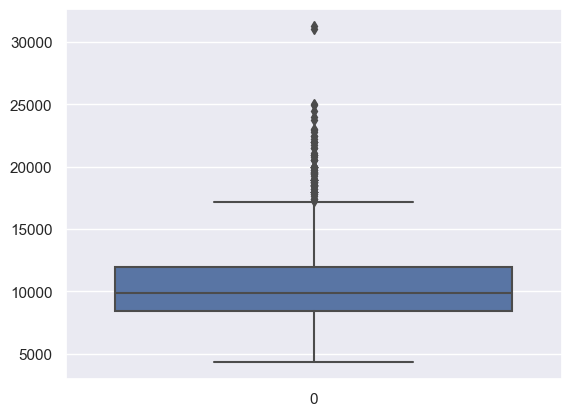

In [48]:
sns.boxplot(df1['Price'])

<Axes: xlabel='FuelType', ylabel='Price'>

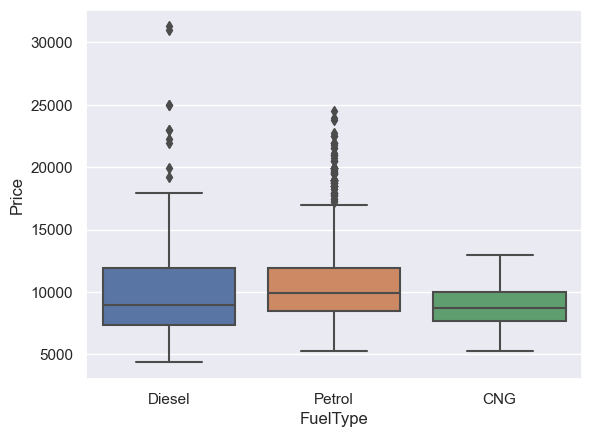

In [49]:
sns.boxplot(x=df1['FuelType'],y=df1['Price'])

<Axes: xlabel='FuelType', ylabel='Price'>

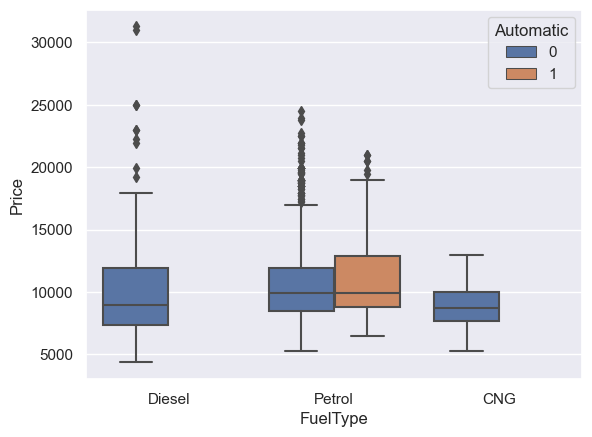

In [50]:
sns.boxplot(x='FuelType',y='Price',data=df1,hue='Automatic')

<Axes: xlabel='Price'>

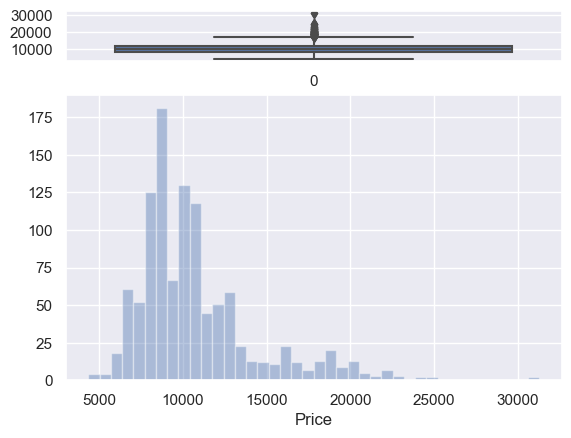

In [51]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={"height_ratios" :(.15,.85)})

sns.boxplot(df1['Price'],ax=ax_box)
sns.distplot(df1['Price'],ax=ax_hist,kde=False)

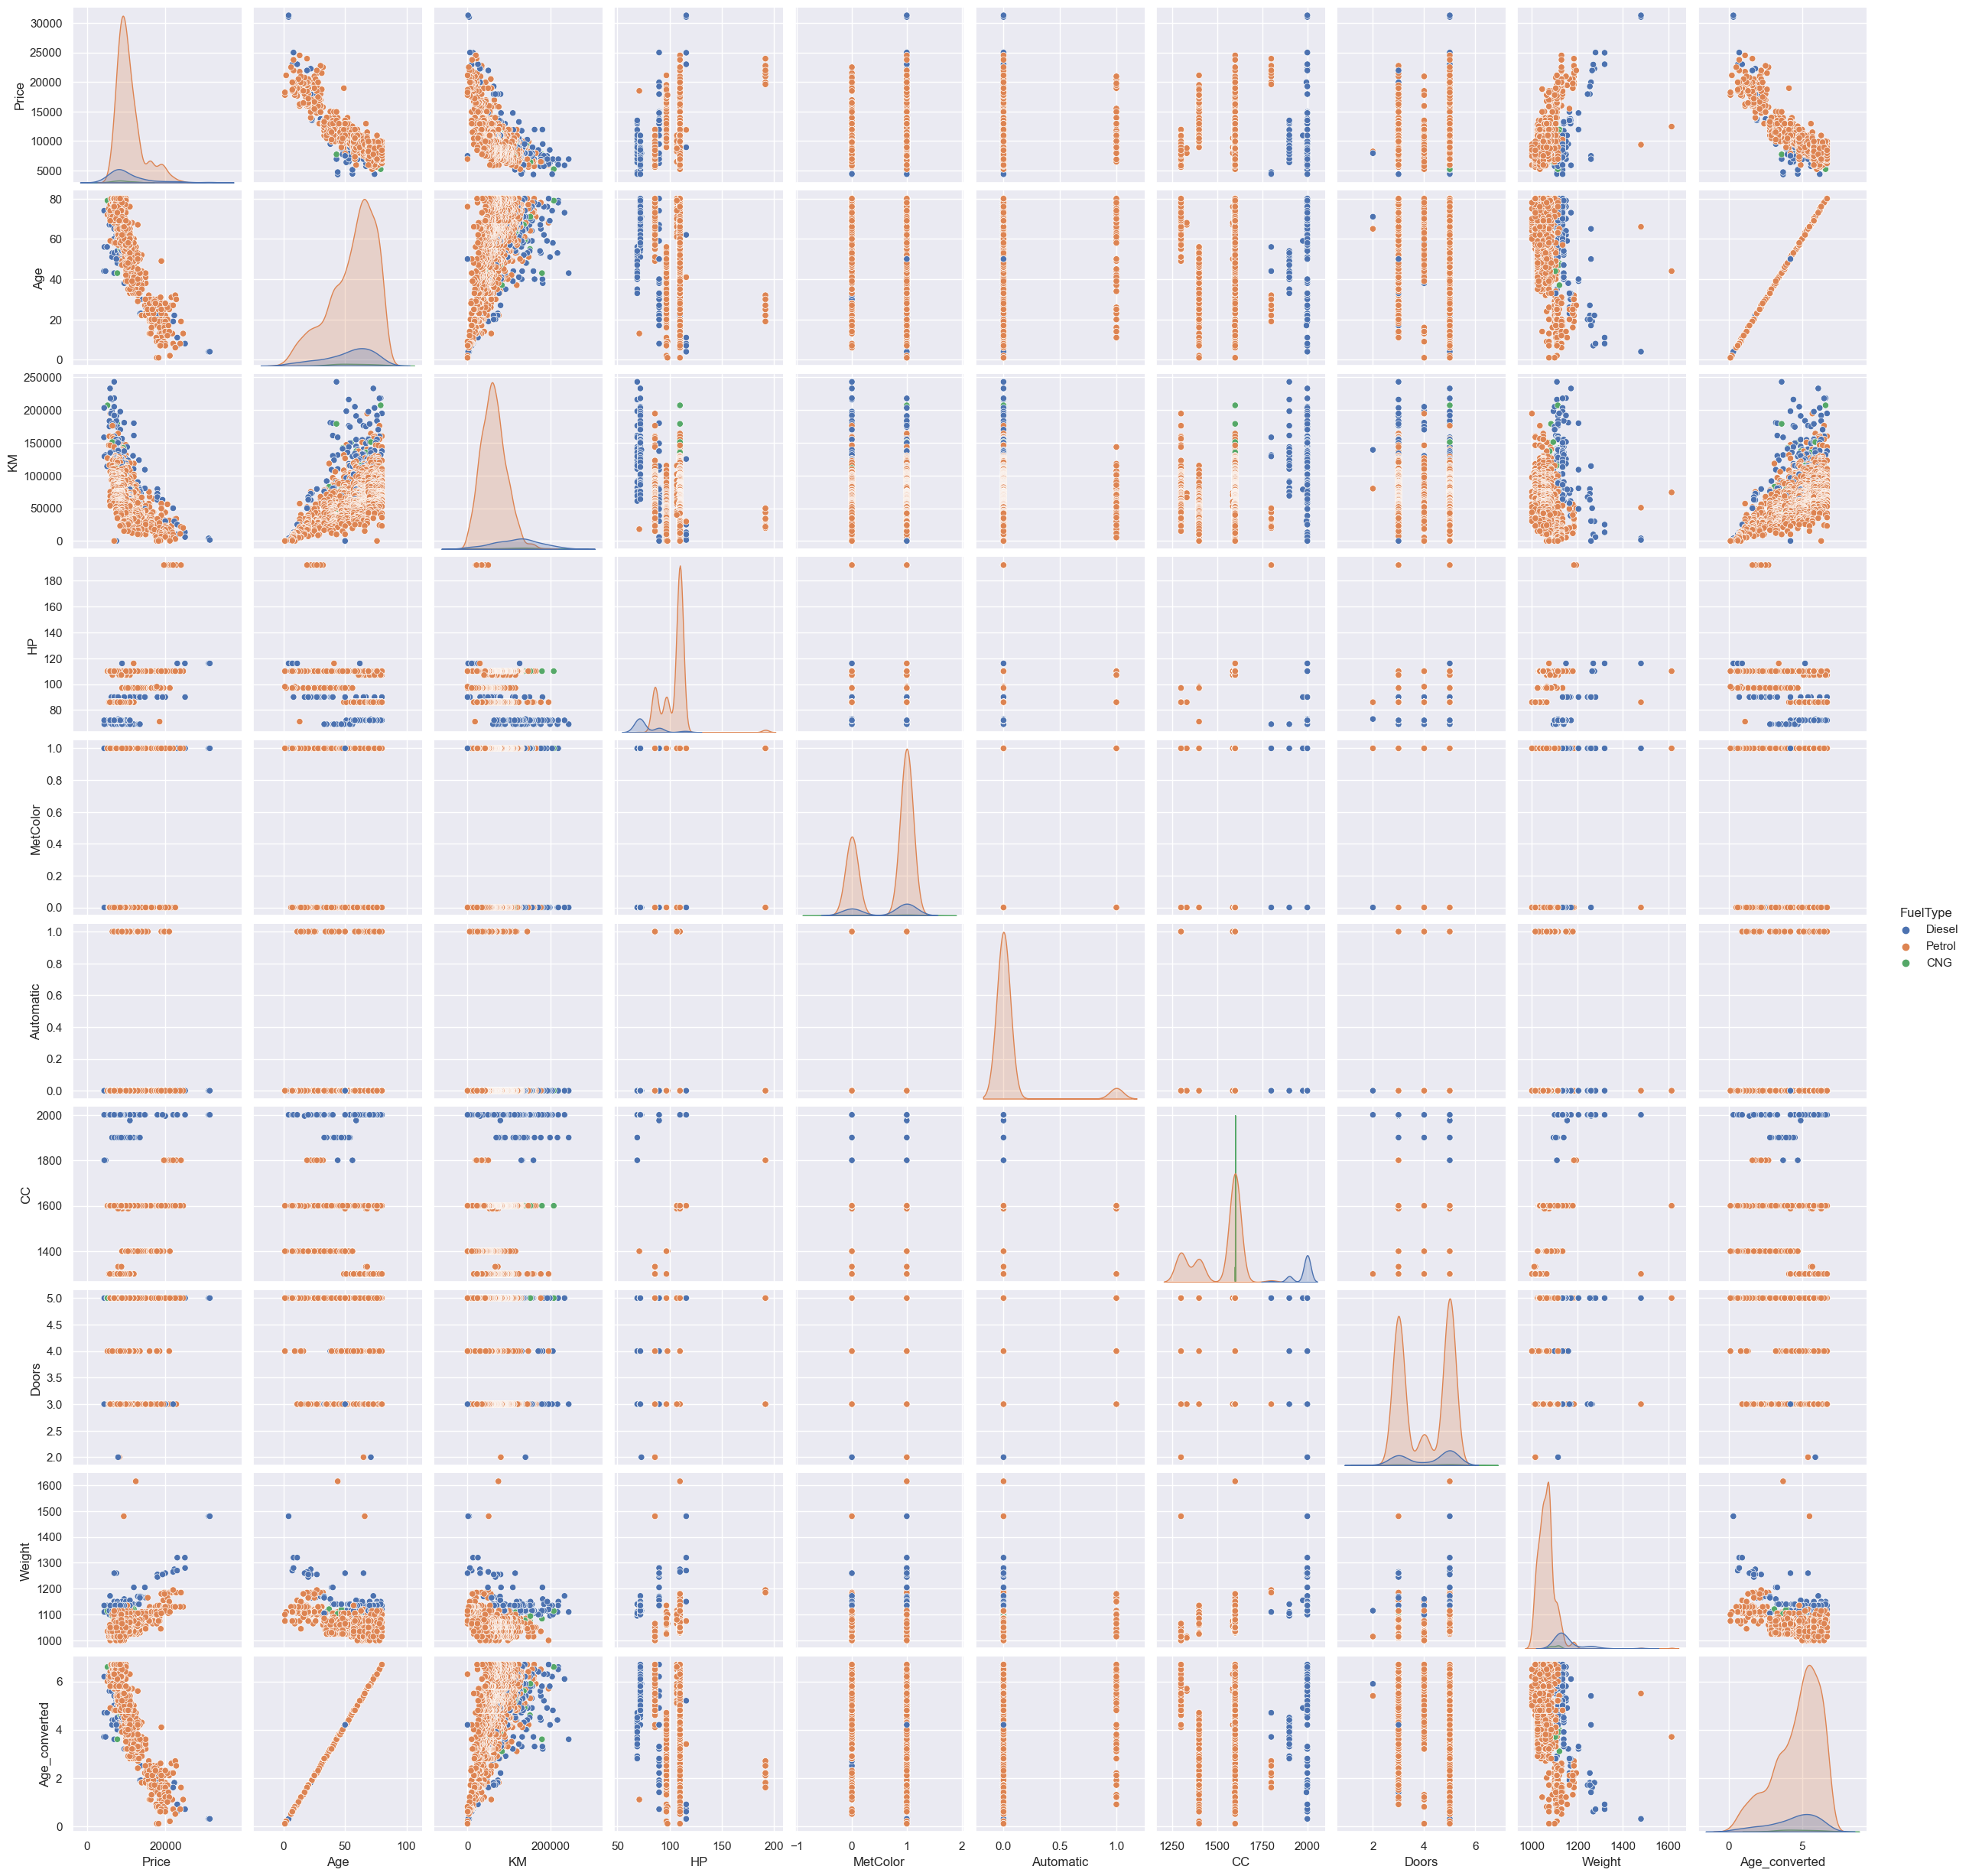

In [52]:
sns.pairplot(df1,kind='scatter',hue='FuelType')
plt.show()

## Imputing missing values

In [53]:
df.isnull().sum()

Price              0
Age              100
KM                15
FuelType         100
HP                 6
MetColor         150
Automatic          0
CC                 0
Doors              0
Weight             0
Price_class        0
Age_converted    100
dtype: int64

In [54]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight,Age_converted
count,1436.000000,1336.000000,1421.000000,1430.000000,1436.000000,1436.000000,1436.00000,1336.000000
mean,10730.824513,55.672156,68647.239972,101.478322,1566.827994,4.033426,1072.45961,4.640943
std,3626.964585,18.589804,37333.023589,14.768255,187.182436,0.952677,52.64112,1.549853
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,1000.00000,0.100000
25%,8450.000000,43.000000,43210.000000,90.000000,1400.000000,3.000000,1040.00000,3.600000
50%,9900.000000,60.000000,63634.000000,110.000000,1600.000000,4.000000,1070.00000,5.000000
75%,11950.000000,70.000000,87000.000000,110.000000,1600.000000,5.000000,1085.00000,5.800000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,1615.00000,6.700000


In [55]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [56]:
df['KM'].fillna(df['KM'].median(), inplace=True)

In [57]:
df['HP'].fillna(df['HP'].mean(), inplace=True)


In [58]:
df['MetColor'].fillna(df['MetColor'].value_counts().index[0],inplace=True)

In [59]:
df['FuelType'].fillna(df['FuelType'].value_counts().index[0],inplace=True)

In [60]:
df['Age_converted'] = c_convert(df['Age'])
df['Age_converted'] = round(df['Age_converted'],1)

In [61]:
df.isnull().sum()

Price            0
Age              0
KM               0
FuelType         0
HP               0
MetColor         0
Automatic        0
CC               0
Doors            0
Weight           0
Price_class      0
Age_converted    0
dtype: int64